In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

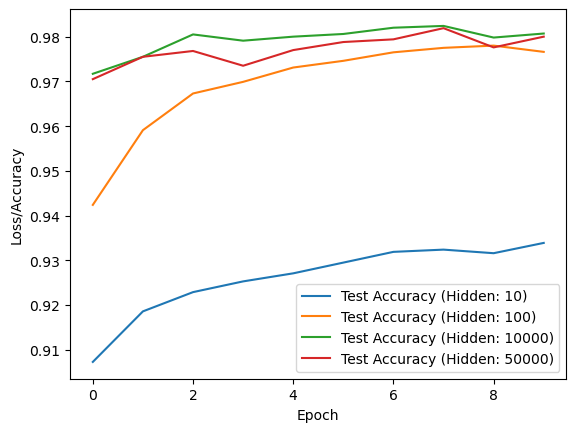

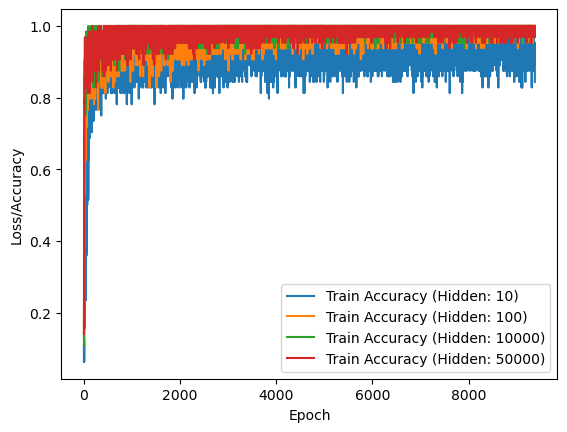

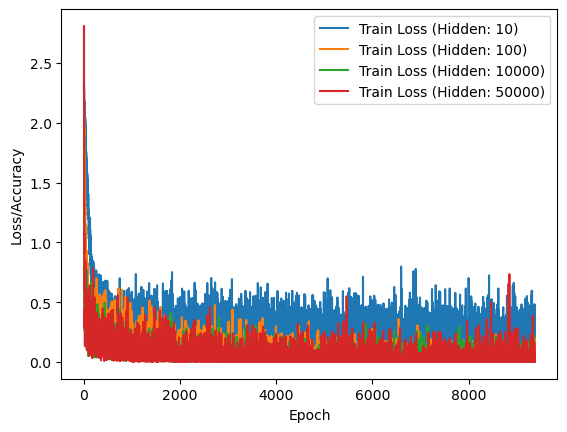

In [3]:
learning_rate = 0.001
epochs = 10
batch_size = 64


# Define model architecture (function for easy width adjustment)
def create_mlp(hidden_size):
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784, hidden_size),  # Input layer with 784 features (28x28 pixels)
        nn.ReLU(),  # Activation function
        nn.Linear(hidden_size, 10),  # Output layer with 10 units (one for each digit)
    )
    return model


# Load MNIST dataset
train_data = datasets.MNIST(
    "./data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = datasets.MNIST(
    "./data", train=False, download=True, transform=transforms.ToTensor()
)

# Define data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Train models with different hidden layer sizes (modify hidden_sizes list)
hidden_sizes = [
    10,
    100,
    10000,
    50000,
]  # Experiment with different widths here (limit: ~500,000 parameters)
models = []
training_losses = []
training_accuracies = []
test_accuracies = []

for hidden_size in hidden_sizes:
    model = create_mlp(hidden_size)
    models.append(model)

    # Define optimizer, excluding non-learnable parameters
    optimizer = torch.optim.Adam(
        filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate
    )

    # Initialize loss and accuracy lists for each model
    model_training_losses = []
    model_training_accuracies = []
    model_test_accuracies = []

    for epoch in range(epochs):
        for data, target in train_loader:
            optimizer.zero_grad()  # Clear gradients
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()  # Update weights

            # Calculate training accuracy
            _, predicted = torch.max(output.data, 1)
            train_acc = (predicted == target).sum().item() / len(target)
            model_training_losses.append(loss.item())
            model_training_accuracies.append(train_acc)

        # Evaluate on test set after each epoch
        with torch.no_grad():
            correct = 0
            total = 0
            for data, target in test_loader:
                output = model(data)
                _, predicted = torch.max(output.data, 1)
                correct += (predicted == target).sum().item()
                total += target.size(0)

            test_acc = correct / total
            model_test_accuracies.append(test_acc)

    # Store losses and accuracies for each model
    training_losses.append(model_training_losses)
    training_accuracies.append(model_training_accuracies)
    test_accuracies.append(model_test_accuracies)

# Plot the training curves
import matplotlib.pyplot as plt

for i, hidden_size in enumerate(hidden_sizes):
    # plt.plot(training_losses[i], label=f'Train Loss (Hidden: {hidden_size})')
    # plt.plot(training_accuracies[i], label=f'Train Accuracy (Hidden: {hidden_size})')
    plt.plot(test_accuracies[i], label=f"Test Accuracy (Hidden: {hidden_size})")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.show()


for i, hidden_size in enumerate(hidden_sizes):
    # plt.plot(training_losses[i], label=f'Train Loss (Hidden: {hidden_size})')
    plt.plot(training_accuracies[i], label=f"Train Accuracy (Hidden: {hidden_size})")
    # plt.plot(test_accuracies[i], label=f'Test Accuracy (Hidden: {hidden_size})')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.show()

for i, hidden_size in enumerate(hidden_sizes):
    plt.plot(training_losses[i], label=f"Train Loss (Hidden: {hidden_size})")
    # plt.plot(training_accuracies[i], label=f'Train Accuracy (Hidden: {hidden_size})')
    # plt.plot(test_accuracies[i], label=f'Test Accuracy (Hidden: {hidden_size})')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.show()

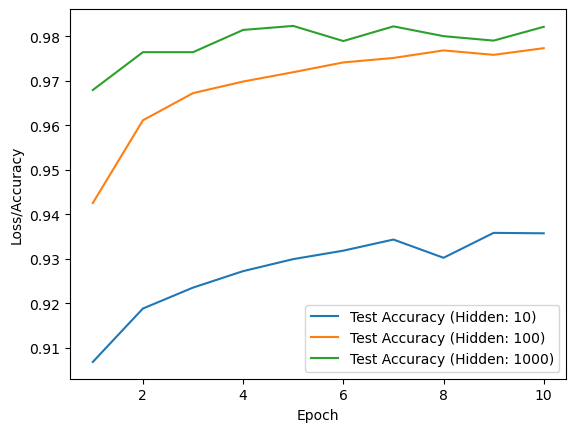

In [9]:
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)  # Use the correct number of epochs

for i, hidden_size in enumerate(hidden_sizes):
    # plt.plot(epochs_range, training_losses[i], label=f'Train Loss (Hidden: {hidden_size})')
    # plt.plot(epochs_range, training_accuracies[i], label=f'Train Accuracy (Hidden: {hidden_size})')
    plt.plot(
        epochs_range, test_accuracies[i], label=f"Test Accuracy (Hidden: {hidden_size})"
    )  # Plot test accuracy across all epochs
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.show()

In [6]:
len(test_accuracies)

4

In [7]:
test_accuracies

[[0.9042,
  0.9144,
  0.9184,
  0.9214,
  0.9246,
  0.925,
  0.9285,
  0.9273,
  0.9277,
  0.928],
 [0.9404,
  0.9598,
  0.9667,
  0.9691,
  0.9731,
  0.9742,
  0.9748,
  0.9756,
  0.9758,
  0.9747],
 [0.9704,
  0.9691,
  0.9785,
  0.9784,
  0.9755,
  0.9796,
  0.9796,
  0.9802,
  0.9795,
  0.9751],
 [0.9731,
  0.9732,
  0.9774,
  0.9763,
  0.9807,
  0.9743,
  0.9782,
  0.9794,
  0.9769,
  0.9816]]

In [4]:
import torch

url = "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth"
model_path = "/Users/abhashshrestha/Downloads"

torch.hub.download_url_to_file(url, model_path)

100%|██████████| 170M/170M [00:04<00:00, 37.7MB/s] 


In [8]:
state_dict = torch.hub.load_state_dict_from_url(
    "https://s3.amazonaws.com/pytorch/models/resnet18-5c106cde.pth"
)

Downloading: "https://s3.amazonaws.com/pytorch/models/resnet18-5c106cde.pth" to /Users/abhashshrestha/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:51<00:00, 911kB/s] 


In [6]:
import torchvision.models as models

# Load the pre-trained VGG-19 model
vgg19 = models.vgg19(pretrained=True)

# Display the architecture of the VGG-19 model
print(vgg19)

/Users/abhashshrestha/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/abhashshrestha/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /Users/abhashshrestha/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:15<00:00, 36.2MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [7]:
import torchvision.models as models

# Download the pre-trained VGG-19 model
vgg19 = models.vgg19(pretrained=True)

# Save the model to a file
torch.save(vgg19, "vgg19.pth")

In [9]:
import pathlib
import re
import sys

MODEL_URL_PATTERN = re.compile(r"https://download[.]pytorch[.]org/models/.+?[.]pth")


def main(*roots):
    model_urls = set()
    for root in roots:
        for path in pathlib.Path(root).rglob("*.py"):
            with open(path, "r") as file:
                for line in file:
                    model_urls.update(MODEL_URL_PATTERN.findall(line))

    print("\n".join(sorted(model_urls)))

In [10]:
main()